In [1]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd 

from matplotlib import pyplot as plt
from autoencoder import network
from autoencoder import utils


/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
datadir =  '/media/cjw/Data/cyto/mmFromTifs3/'
cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-04-18-LS256/checkpoint-2018-04-18-16-56-46/"
meta = 'autoencoder-256x-27960.meta'
path =  "autoencoder-256x-27960"

In [3]:
tf.reset_default_graph()
sess = tf.Session(config=tf.ConfigProto(device_count={'GPU': 0}))
saver = tf.train.import_meta_graph(cpdir + meta)


In [4]:
vars = tf.trainable_variables()
for v in vars:
    print(v)

<tf.Variable 'filter_00/kernel:0' shape=(3, 3, 4, 128) dtype=float32_ref>
<tf.Variable 'filter_00/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'filter_01/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>
<tf.Variable 'filter_01/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'filter_02/kernel:0' shape=(3, 3, 256, 512) dtype=float32_ref>
<tf.Variable 'filter_02/bias:0' shape=(512,) dtype=float32_ref>
<tf.Variable 'latent_space/kernel:0' shape=(8192, 256) dtype=float32_ref>
<tf.Variable 'latent_space/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'dense/kernel:0' shape=(256, 8192) dtype=float32_ref>
<tf.Variable 'dense/bias:0' shape=(8192,) dtype=float32_ref>
<tf.Variable 'conv2d_transpose/kernel:0' shape=(3, 3, 256, 512) dtype=float32_ref>
<tf.Variable 'conv2d_transpose/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'conv2d_transpose_1/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>
<tf.Variable 'conv2d_transpose_1/bias:0' shape=(128,) dtype=float32_ref>
<

In [5]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    print(op.name)
    print('------')

Placeholder
------
Placeholder_1
------
filter_00/kernel/Initializer/truncated_normal/shape
------
filter_00/kernel/Initializer/truncated_normal/mean
------
filter_00/kernel/Initializer/truncated_normal/stddev
------
filter_00/kernel/Initializer/truncated_normal/TruncatedNormal
------
filter_00/kernel/Initializer/truncated_normal/mul
------
filter_00/kernel/Initializer/truncated_normal
------
filter_00/kernel
------
filter_00/kernel/Assign
------
filter_00/kernel/read
------
filter_00/bias/Initializer/zeros
------
filter_00/bias
------
filter_00/bias/Assign
------
filter_00/bias/read
------
filter_00/convolution/Shape
------
filter_00/convolution/dilation_rate
------
filter_00/convolution
------
filter_00/BiasAdd
------
mul/y
------
mul
------
Maximum
------
dropout/keep_prob
------
dropout/Shape
------
dropout/random_uniform/min
------
dropout/random_uniform/max
------
dropout/random_uniform/RandomUniform
------
dropout/random_uniform/sub
------
dropout/random_uniform/mul
------
dropo

gradients/dropout_4/mul_grad/Sum_1
------
gradients/dropout_4/mul_grad/Reshape_1
------
gradients/dropout_4/mul_grad/tuple/group_deps
------
gradients/dropout_4/mul_grad/tuple/control_dependency
------
gradients/dropout_4/mul_grad/tuple/control_dependency_1
------
gradients/dropout_4/div_grad/Shape
------
gradients/dropout_4/div_grad/Shape_1
------
gradients/dropout_4/div_grad/BroadcastGradientArgs
------
gradients/dropout_4/div_grad/RealDiv
------
gradients/dropout_4/div_grad/Sum
------
gradients/dropout_4/div_grad/Reshape
------
gradients/dropout_4/div_grad/Neg
------
gradients/dropout_4/div_grad/RealDiv_1
------
gradients/dropout_4/div_grad/RealDiv_2
------
gradients/dropout_4/div_grad/mul
------
gradients/dropout_4/div_grad/Sum_1
------
gradients/dropout_4/div_grad/Reshape_1
------
gradients/dropout_4/div_grad/tuple/group_deps
------
gradients/dropout_4/div_grad/tuple/control_dependency
------
gradients/dropout_4/div_grad/tuple/control_dependency_1
------
gradients/Maximum_4_grad/S

In [12]:
encoder = g.get_tensor_by_name('latent_space/BiasAdd:0')
decoder = g.get_tensor_by_name('decoder_out/BiasAdd:0')

In [13]:
p = g.get_tensor_by_name('Placeholder:0')

In [8]:
saver.restore(sess, cpdir + path)

INFO:tensorflow:Restoring parameters from /media/cjw/Data/cyto/Checkpoints/2018-04-18-LS256/checkpoint-2018-04-18-16-56-46/autoencoder-256x-27960


In [20]:
a = np.random.randn(1,32,32, 4)

In [21]:
v = encoder.eval({p:a}, session=sess)
vb = decoder.eval({p:a}, session=sess)
vb.shape, v.shape


((1, 32, 32, 4), (1, 256))

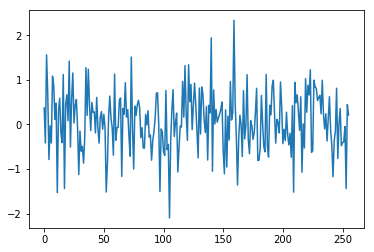

In [22]:
plt.plot(v[0])
#plt.plot(vb, color='orange')
plt.show()

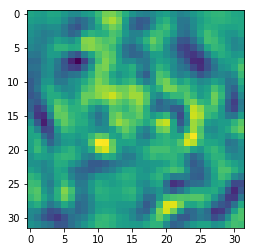

In [23]:
plt.imshow(vb[0,:,:,0])
plt.show()